# Final exam

**Note:** Use these guidelines if and only if you are taking the **final exam**. If you are working on a **final project of your own design**, see the (separate) [final project guidelines](https://github.com/wilkens-teaching/info3350-f20/blob/master/final_exam/final_project_guidelines.ipynb).

## Guidelines

This exam is for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you must complete a final project of your own design.

### The task

Your task is to: identify an interesting problem that's addressable with the help of computational methods applied to the supplied corpus, formulate a hypothesis about that problem, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

This workflow essentially replicates the process of writing an academic paper. You can think of your exam as a paper in miniature.

You are free to present each component as you see fit. You should use free-form text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion are unlikely to earn high marks. 

Your project should reflect, at minimum, ten or more hours of work, though you will be graded on the quality of your output, not the amount of time it took you to produce it.

### The corpus

We have supplied you with a corpus of 1,540 volumes of American fiction published between 1789 and 1875, as well as a range of potentially relevant metadata. This corpus is large: it contains well over 100 million words. Some summary and descriptive statistics are included below, along with a short annotation of the metadata fields.

**Be aware that some (but certainly not all) text analysis tasks will be slow (or impossible) when run over a corpus as large as this one.** For comparison purposes, the album review dataset we used for problem set 11 contained about 10% as many words (but a lot more total documents). You might consider whether or not your question requires the use of the full corpus.

Volumes in the corpus are those that were included in volumes 1 and 2 of Lyle Wright's three-volume bibliography of American fiction before 1900 and that were digitized by the University of Virginia (1789-1850) and Indiana University (1851-1875). This corpus includes about 40% of the American fiction from the period (1789-1875) that has been preserved in American academic libraries. You might think a little about what kinds of books are most likely to have found their way first into print and then into academic libraries, and what kinds of books (and authors) might not have.

Metadata were collected manually by a team of undergraduate students at the University of Notre Dame.

**Note that the nineteenth century was awful.** These books reflect that fact in all kinds of ways, even though (or maybe because) they were generally considered unproblematic at the time. If you read the books or dig very far into the most informative features, you will quickly discover objectionable content. It would be valuable to devise (and you will be rewarded for devising) methods to avoid displaying unmasked versions of racial slurs, for example, in any visualization that might otherwise include them.

### Format

You should submit your exam as a report in the form of a Jupyter notebook that includes all code, figures, and write-up.

Your report should have four basic sections (provided in cells below for ease of reference and reuse):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This exam is the take-home final for the course. It is worth 20% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The exam is due at **5:00pm EST on Saturday, December 19, 2020** via upload to CMS.
* **You must work alone.** You may not collaborate with others.
    * You may post questions on Campuswire, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

## 1. Introduction and hypothesis

## 2. Data and methods

In [1]:
# Imports
import os
import pandas as pd

# File locations
#   Note that metadata are supplied as a TSV file
#   Text files are in a directory, one file per (long, novel-like) document
metadata_file = os.path.join('..', 'data', 'us_fiction', 'corpus_data.tsv')
text_dir      = os.path.join('..', 'data', 'us_fiction', 'us_texts')

In [2]:
# Load the metadata
metadata = pd.read_csv(
    metadata_file, 
    sep='\t',
    low_memory=False
).set_index('source_id')

### Corpus details

The cells below are supplied to help you understand the corpus. **You should remove them from your completed exam** and include only the information you deem relevant to your report. That said, you are free to keep the metadata-loading code above and you may copy any and all of the other code below for your own purposes.

In [3]:
# Glance at the metadata
metadata.head()

,author,title,pub_place,publisher,pub_date,gender,gender_guess,ethnicity,occupation,occupation_free,state_born,state_main,state_died,born,died,words
source_id,,,,,,,,,,,,,,,,
eaf001,"Allston, Washington",Monaldi,Boston,C. C. Little and J. Brown,1841,M,0.0,White,Arts,Painter,SC,MA,MA,1779.0,1843.0,47541
eaf002,"Bacon, Delia Salter",Tales of the puritans,New Haven [Conn.],A. H. Maltby,1831,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,70010
eaf003,"Bacon, Delia Salter",Love's martyr,Cincinnati,Printed by E. Morgan and Co.,1838,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,13547
eaf004,"Bacon, Delia Salter",The bride of Fort Edward,New York,Samuel Colman,1839,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,34309
eaf005,"Belknap, Jeremy",The foresters,Boston,Printed by I. Thomas and E. T. Andrews,1792,M,0.0,White,Church,Minister,MA,NH,MA,1744.0,1798.0,33731


In [4]:
# Summary stats for numeric columns
metadata.describe()

,pub_date,gender_guess,born,died,words
count,1540.000000,1425.000000,1188.000000,1165.000000,1.540000e+03
mean,1853.963636,0.197193,1811.624579,1878.185408,7.584156e+04
std,15.764799,0.398019,17.669353,22.077845,5.916979e+04
min,1789.000000,0.000000,1744.000000,1793.000000,1.667000e+03
25%,1845.000000,0.000000,1804.000000,1860.000000,4.820550e+04
50%,1855.000000,0.000000,1811.000000,1881.000000,6.927450e+04
75%,1867.000000,0.000000,1823.000000,1893.000000,9.377150e+04
max,1875.000000,1.000000,1857.000000,1934.000000,1.150556e+06


### Field definitions and distributional stats

Most of the metadata fields are self-explanatory, but here are some details. Note that not every field in the metadata is described below.

* `source_id`: This is the name of the file corresponding to the volume. You can use it to match metadata records to full-text documents. Note that the corpus includes a nontrivial number of multivolume works. These volumes have `source_id`s like `eaf086v1` or `Wright2-1720v2`.
* `gender`: Author gender. `M`, `F`, or  `NaN` (= unknown).
* `gender_guess`: Was the author gender assignment determined by biographical research (`0`) or by guessing on the basis of the author's name (`1`)?
* `ethnicity`: Author ethnicity. One of `White`, `Black`, `Native`, or `NaN` (= unknown). Always assigned via biographical research. Not very useful, as the values are almost exclusively `White` or `NaN`. This fact tells you something about the US literary field in the nineteenth century.
* `occupation` and `occupation_free`: The author's primary employment identification. Recall that the US in the nineteenth century didn't always have a large market for novels, so many of the authors in the corpus made their living by other means. The difference between these fields is that `occupation` uses a fixed vocabulary, while `occupation_free` does not (so includes more detailed or fine-grained information).
* `state_*`: The state in which the author was `born`, `died`, and with which they are conventionally associated (`main`).
* `born` and `died`: Year of the author's birth and death, respectively, where known.

In [5]:
# Occurrence counts for selected metadata fields
for col in ['gender', 'gender_guess', 'ethnicity', 'occupation', 'state_main']:
    display(metadata[col].value_counts())
    print()

M    1005
F     420
Name: gender, dtype: int64

0.0    1144
1.0     281
Name: gender_guess, dtype: int64

White     1040
Native       3
Black        3
Name: ethnicity, dtype: int64

Editor-Critic-Journalist        217
Writer                          187
Education                       147
Politics-Government-Activism    136
Church                          121
Military-Seafaring               72
Law                              57
Business-Trade                   33
Medicine                         28
Agriculture-Land                  6
Arts                              6
Name: occupation, dtype: int64

NY         286
MA         123
PA          97
MS          74
MD          72
ME          69
DC          38
SC          32
CT          26
OH          23
VA          22
NC          16
NJ          13
MO          11
IL          11
VT           9
IN           8
Germany      7
CA           7
LA           5
WV           5
GA           5
AL           4
RI           3
KY           3
OR           3
MI           3
MN           2
TN           2
AR           2
England      1
NH           1
CO           1
TX           1
FL           1
Italy        1
Name: state_main, dtype: int64

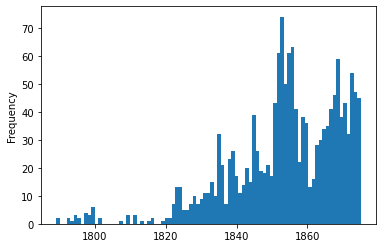

In [6]:
# Distribution of publication dates
metadata.pub_date.plot.hist(bins=metadata.pub_date.max()-metadata.pub_date.min()+1);

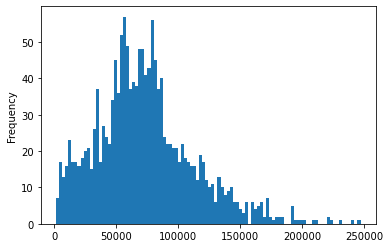

In [7]:
# Distribution of volume lengths
#   Note removal of long volumes
metadata.loc[metadata.words.between(0,250000)].words.plot.hist(bins=100);

The corpus includes some very long and very short volumes. Think about what you want to do with outliers. You'll also want to think about whether or not to break each volume into chunks; this is a good idea for some purposes, but not for others.

## 3. Results

## 4. Discussion and conclusions